<a href="https://colab.research.google.com/github/rareshnz/Licenta_Ciuperci/blob/main/CNN1_Ciuperci1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Input


In [ ]:
dataset_path = "/content/drive/MyDrive/Mushrooms"
categories = ["Agaricus", "Amanita", "Boletus", "Cortinarius", "Entoloma", "Exidia", "Hygrocybe", "Inocybe", "Lactarius", "Pluteus", "Russula", "Suillus"]

images = []
labels = []

In [ ]:
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)

    for img_path in os.listdir(category_path):
        img = cv2.imread(os.path.join(category_path, img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        images.append(img)
        labels.append(i)

In [ ]:
X = np.array(images, dtype=np.float32) / 255.0
y = np.array(labels, dtype=np.int64)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X_train)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(categories), activation='softmax')
])
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
checkpoint = ModelCheckpoint("model.h5", save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history=model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
239/239 [==============================] - 88s 324ms/step - loss: 2.6122 - accuracy: 0.1790 - val_loss: 2.2476 - val_accuracy: 0.2334
Epoch 2/100
239/239 [==============================] - 74s 311ms/step - loss: 2.1854 - accuracy: 0.2349 - val_loss: 2.3528 - val_accuracy: 0.2229
Epoch 3/100
239/239 [==============================] - 75s 313ms/step - loss: 2.1026 - accuracy: 0.2720 - val_loss: 2.1126 - val_accuracy: 0.2732
Epoch 4/100
239/239 [==============================] - 76s 318ms/step - loss: 2.0381 - accuracy: 0.2974 - val_loss: 2.0334 - val_accuracy: 0.3104
Epoch 5/100
239/239 [==============================] - 75s 312ms/step - loss: 1.9824 - accuracy: 0.3167 - val_loss: 2.0191 - val_accuracy: 0.3167
Epoch 6/100
239/239 [==============================] - 75s 314ms/step - loss: 1.9297 - accuracy: 0.3310 - val_loss: 2.1036 - val_accuracy: 0.3214
Epoch 7/100
239/239 [==============================] - 74s 310ms/step - loss: 1.8758 - accuracy: 0.3552 - val_loss: 1.9784 -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 512)               9

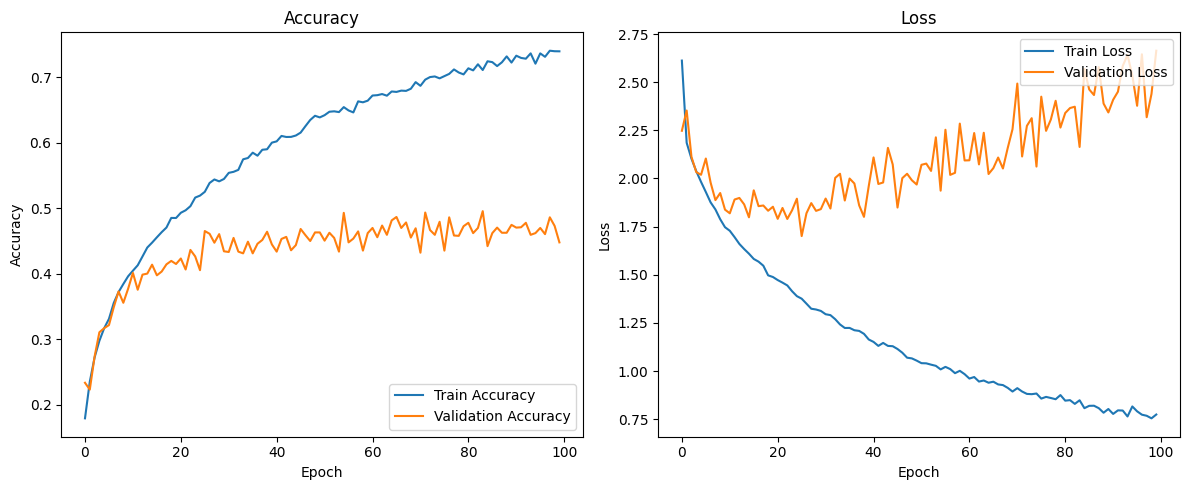

In [ ]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(loc='lower right')

    # Plot loss
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()
plot_training_history(history)

60/60 [==============================] - 1s 11ms/step


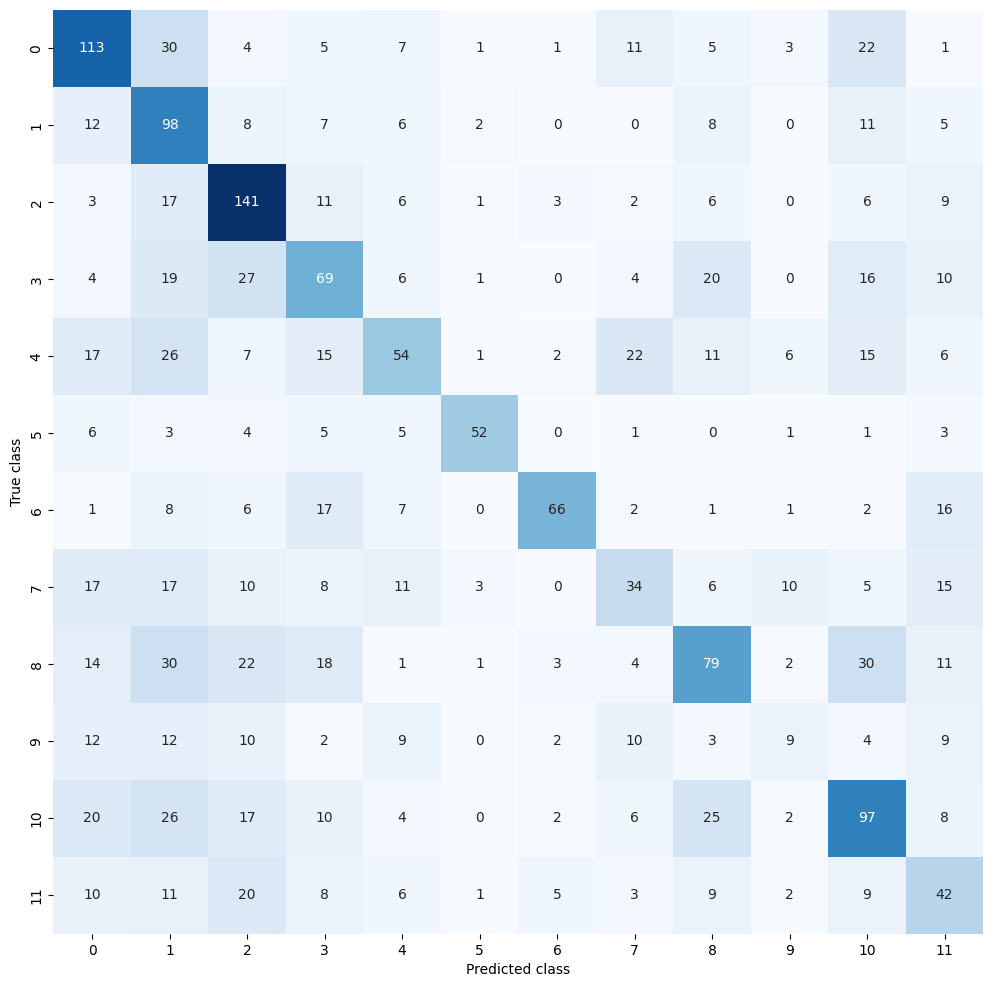

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_val, y_val):
    y_pred = np.argmax(model.predict(X_val), axis=1)
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

plot_confusion_matrix(model, X_val, y_val)

60/60 [==============================] - 1s 11ms/step


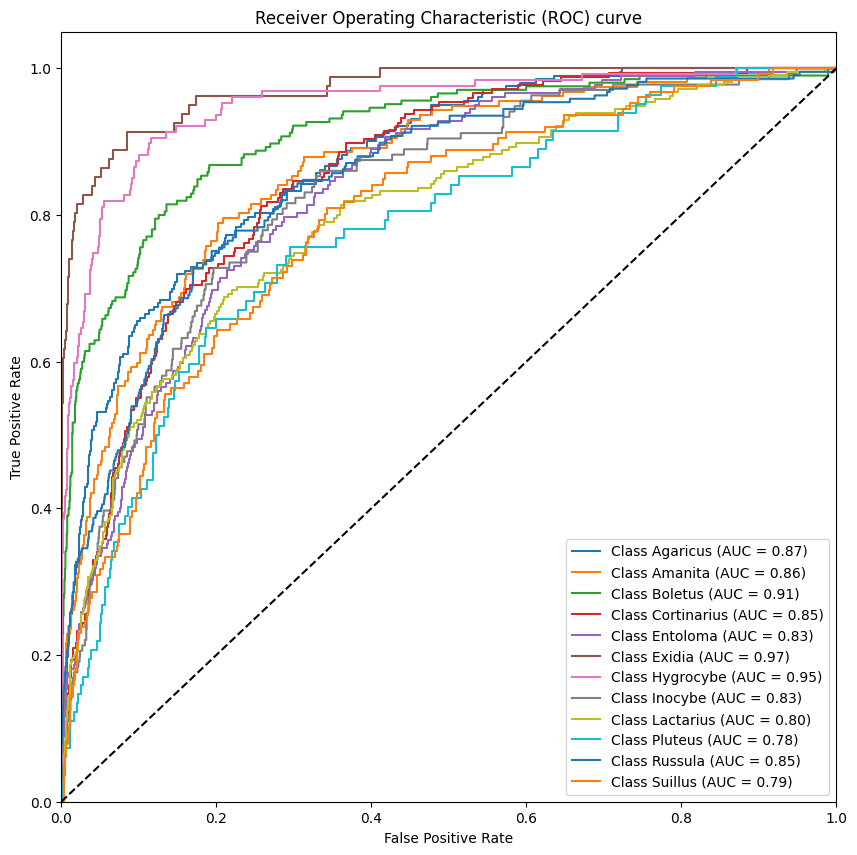

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

def plot_roc_and_auc(model, X_val, y_val, categories):
    n_classes = len(categories)

    y_val_binarized = label_binarize(y_val, classes=np.arange(n_classes))
    y_pred = model.predict(X_val)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], y_pred[:, i])
        roc_auc[i] = roc_auc_score(y_val_binarized[:, i], y_pred[:, i])

    # Plot ROC curve
    plt.figure(figsize=(10, 10))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {categories[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_and_auc(model, X_val, y_val, categories)

In [ ]:
from sklearn.metrics import classification_report


def print_classification_report(model, X_val, y_val, categories):
    y_pred = np.argmax(model.predict(X_val), axis=1)
    report = classification_report(y_val, y_pred, target_names=categories)
    print(report)

print_classification_report(model, X_val, y_val, categories)

60/60 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

    Agaricus       0.49      0.56      0.52       203
     Amanita       0.33      0.62      0.43       157
     Boletus       0.51      0.69      0.59       205
 Cortinarius       0.39      0.39      0.39       176
    Entoloma       0.44      0.30      0.36       182
      Exidia       0.83      0.64      0.72        81
   Hygrocybe       0.79      0.52      0.63       127
     Inocybe       0.34      0.25      0.29       136
   Lactarius       0.46      0.37      0.41       215
     Pluteus       0.25      0.11      0.15        82
     Russula       0.44      0.45      0.45       217
     Suillus       0.31      0.33      0.32       126

    accuracy                           0.45      1907
   macro avg       0.47      0.44      0.44      1907
weighted avg       0.46      0.45      0.44      1907



In [ ]:
from sklearn.metrics import cohen_kappa_score
import numpy as np

y_pred = np.argmax(model.predict(X_val), axis=1)
kappa = cohen_kappa_score(y_val, y_pred)
print("Cohen's Kappa:", kappa)

60/60 [==============================] - 1s 11ms/step
Cohen's Kappa: 0.3915399162063734


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = np.argmax(model.predict(X_val), axis=1)
cm = confusion_matrix(y_val, y_pred)
false_positive_rate = cm.sum(axis=0) / cm.sum()
false_negative_rate = cm.sum(axis=1) / cm.sum()
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

60/60 [==============================] - 1s 11ms/step
False Positive Rate: [0.1200839  0.155742   0.14472994 0.09176717 0.06397483 0.03303618
 0.04404824 0.051914   0.09071841 0.01887782 0.11431568 0.07079182]
False Negative Rate: [0.10644992 0.08232826 0.10749869 0.09229156 0.09543786 0.04247509
 0.06659675 0.0713162  0.11274253 0.04299948 0.1137913  0.06607236]


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Test_Images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False )
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
print(f"Acuratețea pe setul de test este: {accuracy * 100:.2f}%")

Found 184 images belonging to 12 classes.
6/6 [==============================] - 74s 15s/step
Acuratețea pe setul de test este: 30.43%


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image_paths = [
    '/content/drive/My Drive/poze_reale/1.jpg',
    '/content/drive/My Drive/poze_reale/2.jpg',
    '/content/drive/My Drive/poze_reale/3.jpg',
    '/content/drive/My Drive/poze_reale/4.jpg',
    '/content/drive/My Drive/poze_reale/5.jpg',
    '/content/drive/My Drive/poze_reale/6.jpg',
    '/content/drive/My Drive/poze_reale/7.jpg',
    '/content/drive/My Drive/poze_reale/8.jpg',
    '/content/drive/My Drive/poze_reale/9.jpg',
    '/content/drive/My Drive/poze_reale/10.jpg',
    '/content/drive/My Drive/poze_reale/11.jpg'

]

for image_path in image_paths:

    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)


    pred = model.predict(image)
    class_index = np.argmax(pred)

    print("Predicted class index for image", image_path, ":", class_index)
    print("Predicted probabilities:", pred)

1/1 [==============================] - 0s 58ms/step
Predicted class index for image /content/drive/My Drive/poze_reale/1.jpg : 4
Predicted probabilities: [[8.8728430e-06 1.0647710e-06 3.0372744e-06 5.9030053e-06 9.9202842e-01
  2.8358838e-07 9.0782251e-08 1.0846144e-05 2.8720402e-08 4.8175846e-08
  3.8684083e-09 7.9414649e-03]]
1/1 [==============================] - 0s 21ms/step
Predicted class index for image /content/drive/My Drive/poze_reale/2.jpg : 11
Predicted probabilities: [[2.5529955e-03 3.7095259e-04 1.1748530e-03 6.0999091e-04 1.3585461e-04
  1.1623491e-07 1.1775504e-06 6.2582465e-03 8.2161371e-04 3.4185392e-03
  3.5000267e-03 9.8115563e-01]]
1/1 [==============================] - 0s 22ms/step
Predicted class index for image /content/drive/My Drive/poze_reale/3.jpg : 2
Predicted probabilities: [[8.2117612e-07 2.9917793e-02 9.6151930e-01 1.9929060e-03 8.3553323e-06
  1.7301907e-05 1.8790684e-03 3.3577456e-09 3.5729117e-03 1.9077209e-08
  9.2020883e-07 1.0906028e-03]]
1/1 [====